# Exercise 1: Business cycle correlations

For this exercise, you'll be using macroeconomic data from the folder `data/FRED`.

1.  There are seven decade-specific files named `FRED_monthly_19X0.csv` where `X` identifies the decade (`X` takes on the values 5, 6, 7, 8, 9, 0, 1). Write a loop that reads in all seven files as DataFrames and store them in a list.

    *Hint:* Recall from the lecture that you should use `pd.read_csv(..., parse_dates=['DATE'])` to automatically parse strings stored in the `DATE` column as dates.
2.  Use [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concate these data sets into a single `DataFrame` and set the `DATE` column as the index.
3.  You realize that your data does not include GDP since this variable is only reported at quarterly frequency.
    Load the GDP data from the file `GDP.csv` and merge it with your monthly data using an _inner join_.
4.  You want to compute how (percent) changes of the variables in your data correlate with percent changes in GDP.

    1. Create a _new_ `DataFrame` which contains the percent changes in CPI and GDP (using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html),
    and the absolute changes for the remaining variables (using 
    [`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)).
    2.  Compute the correlation of the percent changes in GDP with the (percent) changes of all other variables using [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). What does the sign and magnitude of the correlation coefficient tell you?



In [58]:
import pandas as pd

DATA_PATH = '../../data/FRED'
data_list = []

for x in range(1950, 2011, 10):
    filename = f'{DATA_PATH}/FRED_monthly_{x}.csv'
    df = pd.read_csv(filename, parse_dates=['DATE'])
    data_list.append(df)

In [59]:
for n in data_list:
    df = pd.concat((data_list), ignore_index=True)

df.set_index(['DATE'], inplace=True)

In [83]:
filename_GDP = f'{DATA_PATH}/GDP.csv'
df_GDP = pd.read_csv(filename_GDP, parse_dates=['DATE'], index_col=['DATE'])

df_merge = pd.merge(df_GDP, df, on='DATE', how='inner')

In [ ]:
df_merge[['CPI_GROWTH', 'GDP_GROWTH' ]] = df_merge[['GDP', 'CPI']].pct_change() * 100
df_merge[['DIFF_UNRATE', 'DIFF_FEDFUNDS', 'DIFF_REALRATE', 'DIFF_LFPART']] = df_merge[['UNRATE', 'FEDFUNDS', 'REALRATE', 'LFPART']].diff()
df_growth = df_merge[['CPI_GROWTH', 'GDP_GROWTH', 'DIFF_UNRATE', 'DIFF_FEDFUNDS', 'DIFF_REALRATE', 'DIFF_LFPART' ]]
df_merge

,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,
1950-01-01,NaN,NaN,NaN,NaN
1950-04-01,-0.7,NaN,NaN,0.3
1950-07-01,-0.8,NaN,NaN,-0.1
1950-10-01,-0.8,NaN,NaN,0.3
1951-01-01,-0.5,NaN,NaN,-0.3
...,...,...,...,...
2018-10-01,0.0,0.3,-0.1,-0.1
2019-01-01,0.2,0.2,0.8,0.2
2019-04-01,-0.3,0.0,2.5,-0.3


KeyError: 'CPI'

***
# Exercise 2: Loading many data files

In the previous exercise, you loaded the individual files by specifing an explicit list of file names. This can become tedious or infeasible if your data is spread across many files with varying file name patterns. Python offers the possibility to iterate over all files in a directory (for example, using [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir)),
or to iterate over files that match a pattern, for example using [`glob.glob()`](https://docs.python.org/3/library/glob.html).

Repeat parts (1) and (2) from the previous exercise, but now iterate over the input files using 
[`glob.glob()`](https://docs.python.org/3/library/glob.html). You'll need to use a wildcard `*` and make sure to match only the relevant files in `data/FRED`, i.e., those that start with `FRED_monthly_1` or `FRED_monthly_2`.

In [106]:
DATA_PATH3 = '../../data/FRED'
pattern = f'{DATA_PATH3}/FRED_monthly_[12]*.csv'

import glob

data = []

for file in glob.glob(pattern):
    df = pd.read_csv(file)
    data.append(df)

df = pd.concat(data, ignore_index=True)
df = df.set_index('DATE').sort_index()

***
# Exercise 3: Weekly returns of the magnificent seven

In this exercise, you are asked to analyze the weekly stockmarket returns
of the so-called magnificent 7 which are some of the most successful tech companies 
of the last decades years:
Apple (AAPL), Amazon (AMZN), Alphabet/Google (GOOGL), Meta (META), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

The data for this exercise is located in the folder `data/stockmarket/`.

1.  For each of the seven stocks listed above, there is a corresponding 
    CSV file in this directory (based on the ticker symbol).

    1.  For each ticker symbol, load the corresponding CSV file and make sure 
        that the `Date` is set as the index.

        The DataFrame has two columns, `Open` and `Close`, which contain the 
        opening and closing price for each trading day.

    3.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
        to resample the daily data to a weekly frequency by specifying `resample('W')`,
        and compute the weekly returns in percent:

        $$
        \text{Weekly returns} = \frac{\text{Close price on last day} - \text{Open price on first day}}{\text{Open price on first day}} \times 100
        $$

        *Hint:* You can obtain the first and last observation using the 
        [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.first.html) and 
        [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.last.html)
        methods.

    4.  Append these returns to a list so you can merge them into a single DataFrame later.

2.  Merge the list of weekly returns you computed into a single DataFrame.
    Keep only the intersection of dates available for all 7 stocks.

    *Hint:* This can be achieved using either 
    [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html),
    [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html), or 
    [`DataFrame.join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

3.  Finally, you are interested in how the weekly returns are correlated across 
    the 7 stocks. 

    1.  Compute and report the pairwise correlations using 
        [DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 7-by-7 subplots showing the pairwise scatter plots of weekly returns 
        for each combination of stocks.

        You can do this either with the
        [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) function contained in `pandas.plotting`, 
        or manually build the figure using Matplotlib functions.

    3.  **[Advanced]**
        In each of the subplots, add a text that reports the pairwise correlation
        for these stocks which you computed earlier.
        (e.g., the correlation between returns on AAPL and AMZN is about 0.42,
        so this text should be added to the subplot showing the 
        scatter plot of AAPL vs. AMZN).


In [154]:
DATA_PATH2 = '../../data/stockmarket'

tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NVDA', 'TSLA', 'MSFT']
stock_data = []

for i in tickers:
    filename3 = f'{DATA_PATH2}/{i}.csv'
    df1 = pd.read_csv(filename3, parse_dates=['Date'], index_col=['Date'])

    first = df1.resample('W')['Open'].first()
    last = df1.resample('W')['Close'].last()

    returns = ((last - first) / first) * 100
    stock_data.append(returns)

In [172]:
df_week = pd.concat(stock_data, axis=1, join='inner')
df_week.columns = tickers
df_corr = df_week.corr()

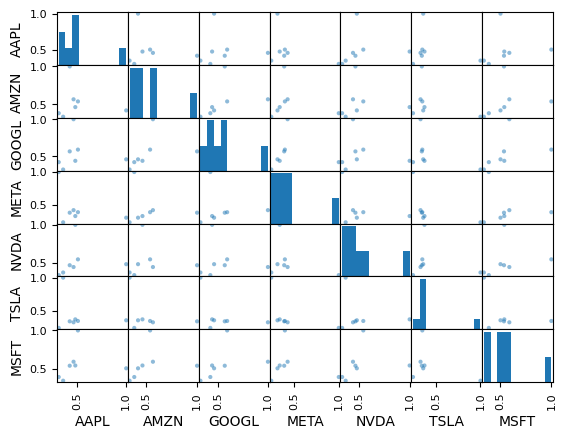

In [176]:
import pandas.plotting as pdp

scatterplot = pdp.scatter_matrix(df_corr)

***
# Exercise 4: Decade averages of macro time series


For this exercise, you'll be using macroeconomic data from the folder `data/FRED`.

1.  There are five files containing monthly observations on annual inflation (INFLATION), the Fed Funds rate (FEDFUNDS), the labor force participation rate (LFPART), the 1-year real interest rate (REALRATE) and the unemployment rate (UNRATE).

    1.  Write a loop to import these files and store the individual DataFrames in a list.

        *Hint:* Recall from the lecture that you should use 
        `pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')` to automatically parse strings stored in the `DATE` column as dates and set the `DATE`
        column as the index.

    2.  Use 
        [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
        to concatenate this list of DataFrames along the column dimension
        using an outer join (`join='outer'`) to obtain a merged data set.

3.  You want to compute the average value of each variable by decade, but you want to include only decades without _any_ missing values for _all_ variables.

    1.  Create a variable `Decade` which stores the decade (1940, 1950, ...) for each observation.

        *Hint:* You should have set the `DATE` as the `DataFrame` index. Then you can access the calendar year using the attribute `df.index.year` which can be used to compute the decade.

    2.  Create an indicator variable which takes on the value `True` 
        whenever all observations (all columns) for a given date are non-missing, and `False`
        if at least one variable has a missing observation. 

    3.  Aggregate this indicator to decades using a
    [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) so that the indicator takes on the value `True` whenever
    _all_ variables in a given decade have no missing values, and `False`
    otherwise.

        *Hint:* You can use the 
        [`all()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.all.html) aggregation for this.

    4.  Merge this decade-level indicator data back into the original `DataFrame` (_many-to-one_ merge). 
4.  Using this indicator, drop all observations which are in a decade with missing values.
5.  Compute the decade average for each variable.

**Challenge**

-   Your pandas guru friend claims that all the steps in 2.2 to 2.4 can be done with a single one-liner using [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html). Can you come up with a solution?

    

In [305]:
DATA_PATH4 = '../../data/FRED'
DATA = ['FEDFUNDS', 'UNRATE', 'LFPART', 'REALRATE', 'INFLATION']

data4 = []

for m in (DATA):
    filename4 = f'{DATA_PATH4}/{m}.csv'
    df4 = pd.read_csv(filename4, parse_dates=['DATE'], index_col='DATE')
    data4.append(df4)

df5 = pd.concat(data4, axis=1,join='outer')


In [307]:
df5['Decade'] = (df5.index.year // 10) * 10
df5['Missing'] = df5.notna().all(axis=1)

In [311]:
indicator = df5.groupby('Decade')['Missing'].all()
df_indicator = indicator.to_frame()

df_final = pd.merge(df_indicator, df5, on='Decade', how='inner')
df_final.set_index('Decade', inplace=True)
df_final.columns

Index(['Missing_x', 'FEDFUNDS', 'UNRATE', 'LFPART', 'REALRATE', 'INFLATION',
       'Missing_y'],
      dtype='object')

In [321]:
df_final = df_final.query('Missing_x == True & Missing_y == True')

In [324]:
df_final.groupby('Decade')[df_final.columns].mean()

,Missing_x,FEDFUNDS,UNRATE,LFPART,REALRATE,INFLATION,Missing_y
Decade,,,,,,,
1990,1.0,5.140000,5.762500,66.668333,2.206667,3.006667,1.0
2000,1.0,2.952500,5.541667,66.236667,1.023333,2.568333,1.0
2010,1.0,0.618333,6.220833,63.295000,-0.732500,1.771667,1.0


***
# Exercise 5: Merging additional Titanic data

In this exercise, you'll be working with the the original Titanic data set in `titanic.csv` and additional (partly fictitious) information on passengers stored in `titanic-additional.csv`, both located in the `data/` folder.

The goal of the exercise is to calculate the survival rates by country of residence (for this exercise we restrict ourselves to the UK, so these will be England, Scotland, etc.).

1.  Load the `titanic.csv` and `titanic-additional.csv` into two DataFrames.

    Inspect the columns contained in both data sets. As you can see, the original data contains the full name including the title
    and potentially maiden name (for married women) in a single column.
    The additional data contains this information in separate columns.
    You want to merge these data sets, but you first need to create common keys in both DataFrames.

2.  Since the only common information is the name, you'll need to extract the individual name components from the original DataFrame
    and use these as merge keys.

    Focusing only on men (who have names that are much easier to parse), split the `Name` column into the tokens 
    `Title`, `FirstName` and `LastName`, just like the columns in the second DataFrame.

    *Hint:* This is the same task as in the last exercise in Workshop 2. You can just use your solution here.

3.  Merge the two data sets based on the columns `Title`, `FirstName` and `LastName` you just created using a _left join_ (_one-to-one_ merge).
    Tabulate the columns and the number of non-missing observations to make sure that merging worked. 

    *Note:* The additional data set contains address information only for passengers from the UK, so some of these fields will be missing.

4.  You are now in a position to merge the country of residence (_many-to-one_ merge). Load the country data from `UK_post_codes.csv` which contains 
    the UK post code prefix (which you can ignore), the corresponding city, and the corresponding country.

    Merge this data with your passenger data set using a _left join_ (what is the correct merge key?).

5.  Tabulate the number of observations by `Country`, including the number of observations with missing `Country` (these are passengers residing outside the UK).

    Finally, compute the mean survival rate by country.

In [ ]:
DATA_PATH5 = '../../data'
filename5 = f'{DATA_PATH5}/titanic.csv'
filename5A = f'{DATA_PATH5}/titanic-additional.csv'

df_titanic = pd.read_csv(filename5)
df_titanic_add = pd.read_csv(filename5A)

In [397]:
df_titanic_men = df_titanic.query('Sex == "male"')

df_titanic_men['Name'] = df_titanic_men['Name'].astype(str)
split = df_titanic_men['Name'].str.partition(', ')

df_titanic_men['LastName'] = split[0]
df_titanic_men['rest'] = split[2]

second_split = df_titanic_men['rest'].str.partition(' ')
df_titanic_men['Title'] = second_split[0]
df_titanic_men['FirstName'] = second_split[2]

df_t1_men = df_titanic_men.drop(columns=['Name', 'rest'])

C:\Users\mjung\AppData\Local\Temp\ipykernel_12912\51288617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_men['Name'] = df_titanic_men['Name'].astype(str)
C:\Users\mjung\AppData\Local\Temp\ipykernel_12912\51288617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_men['LastName'] = split[0]
C:\Users\mjung\AppData\Local\Temp\ipykernel_12912\51288617.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [410]:
df_titanic_merged = pd.merge(df_t1_men, df_titanic_add, on=['FirstName', 'LastName', 'Title'], how='left')
df_titanic_merged = df_titanic_merged.drop(columns=['MaidenName'])
df_titanic_merged.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            124
Ticket           0
Fare             0
Cabin          470
Embarked         0
LastName         0
Title            0
FirstName        0
City           105
Postcode       105
Address        105
dtype: int64

In [423]:
filename_post = f'{DATA_PATH5}/UK_post_codes.csv'
df_post = pd.read_csv(filename_post)

df_titanic_post = pd.merge(df_post, df_titanic_merged, on='City', how='left')

In [425]:
df_titanic_post.groupby('Country')['Survived'].mean() * 100

Country
England             11.458333
Northern Ireland     0.000000
Scotland            19.117647
Wales               12.000000
Name: Survived, dtype: float64